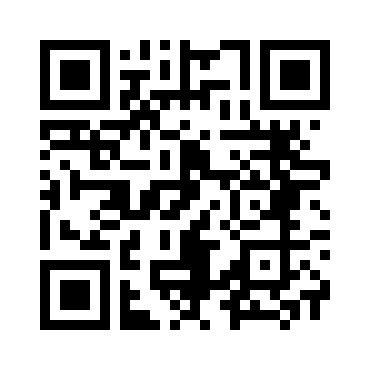

Encrypted data: vq9VsQ2IC0TufI1Iwc+2dUgLEIqt1XUQhtko5VMWiVs=


In [179]:
import qrcode
import sqlite3
import pandas as pd
import polars as pl


conn = sqlite3.connect("database.sqlite")
cur = conn.cursor()

enc_key = data.loc[0, 'encryption_key']
enc_id = data.loc[0, 'encrypted_id']
unenc_id = data.loc[0, 'unencrypted_id']
# Generate the QR code
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)

qr.add_data(enc_id)
qr.make(fit=True)

# Create and save the QR code image
img = qr.make_image(fill='black', back_color='white')
img.save("encrypted_qr_code.png")

# Optionally, show the image
img.show()

# The encrypted data (this is what is encoded in the QR code)
print("Encrypted data:", enc_id)

In [20]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.platypus import Paragraph
from reportlab.lib import colors

qr_image_path = "encrypted_qr_code.png"

# Step 3: Create a PDF with the QR code and text box
pdf_path = "qr_code_with_text.pdf"
c = canvas.Canvas(pdf_path, pagesize=letter)

# Step 4: Draw the QR code image onto the PDF
qr_x, qr_y = 100, 500  # Starting position for QR code
qr_width, qr_height = 200, 200  # Dimensions for the QR code
c.drawImage(qr_image_path, qr_x, qr_y, width=qr_width, height=qr_height)

# Step 5: Add a text box to the right of the QR code
text_x = qr_x + qr_width + 20  # Position the text box to the right of the QR code
text_y = qr_y + qr_height - 150  # Adjust text vertical position
text_width = 200  # Width of the text box
text_height = 100  # Height of the text box

# Add the text box and set the font for the text
c.setFont("Helvetica", 12)
text = f"""
{unenc_id}:
{enc_id}
"""

style = getSampleStyleSheet()['Normal']
style.fontSize = 12
style.leading = 14

# Create a Paragraph with wrapping
paragraph = Paragraph(text, style)

# Step 7: Draw the text in the PDF
# The height of the Paragraph is determined by the number of lines, so we need to adjust the y-position.
paragraph.wrapOn(c, text_width, 200)  # The 200 is a large enough height for wrapping
paragraph.drawOn(c, text_x, text_y)

# Step 8: Save the PDF
c.save()

print(f"PDF with QR code, wrapped text, and forced newlines saved as {pdf_path}")

PDF with QR code, wrapped text, and forced newlines saved as qr_code_with_text.pdf


In [107]:
from reportlab.pdfgen import canvas

class MealStubPDF(canvas.Canvas):
    """A class to create a PDF with meal stub details, including QR code, ID, and border.
    Methods
    -------
    draw_qr_code(x, y, image_path, width, height)
        Draws a QR code image at the specified location with the given dimensions.
    draw_id(text)
        Draws the ID text at the specified location.
    draw_border(x, y, width, height)
        Draws a border rectangle at the specified location with the given dimensions.
    """
    
    def draw_qr_code(self, x, y, image_path, width, height):
        self.drawImage(image_path, x, y, width, height)

    def draw_id(self, text):
        self.drawString(x, y, text)

    def draw_border(self, x, y, width, height, dashed):

        if dashed:
            self.setDash(1, 10)
            
        
        self.rect(x, y, width, height)

    def draw_admit_line(self, start_x, start_y, end_x, end_y, dashed):
        
        if dashed:
            self.setDash(2, 3)
        
        self.line(start_x, start_y, end_x, end_y)

def cm_to_points(centimeter) -> float:
    """Convert a measurement from centimeters to points.

    Args:
        centimeter (float): The measurement in centimeters to be converted.

    Returns:
        float: The measurement converted to points.
    """
    
    return centimeter * 72 / 2.54

def inch_to_points(inch) -> float:
    """Convert a measurement from inches to points.

    Args:
        inch (float): The measurement in inches to be converted.

    Returns:
        float: The measurement converted to points.
    """

    return inch * 72

In [183]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("database.sqlite")
cur = conn.cursor()

data = pd.read_sql("SELECT * FROM keys", conn)
data

,encrypted_id,encryption_key,unencrypted_id,date_added
0,vq9VsQ2IC0TufI1Iwc+2dUgLEIqt1XUQhtko5VMWiVs=,b'\xae1>\xa4\x9eL\xc9B\x91Y\xa8Br\\\x8fMX\x95\...,MP_00001,2025-01-04 09:16:44
1,wxiu9lmKrNj0rYPdX67cGxnFn7QRsOFCyXyzvwLUtzI=,b'\x13lw\x07&9\xd3qU$\xc7\x0c\x18~\x91\xe3\x1c...,MP_00002,2025-01-04 09:16:44
2,CE1SL6B2JXMFOU0v9Qt2Tmy69h3y+90oEecOXOx8T8E=,b'}\xf7W\xbf\x08=`h\xec\xe9`d\xbe\xef\xcd\xbf\...,MP_00003,2025-01-04 09:16:44
3,T7/fZXRX9r69ZTezpMJvJYxLXdVK0H2Dm98RzkPp98A=,b'\xcb:fa\r\xcd\xc6\x1a\x83\xf124]]\x16\x01\x0...,MP_00004,2025-01-04 09:16:44
4,h91dHsBNy5YYyOMPISggAGfy8sPe9rIlYH0cS9CCFIg=,b'P\x96Da\x9c\x00\xdf5*\x80\xf0p\x07\x03\xa6\x...,MP_00005,2025-01-04 09:16:44
...,...,...,...,...
1997,yeWVDa+f9/PIuHcuJ8FM1Ae6zOS4PdCFTFOEc4dd+jc=,b'\xa3\xae-cf\xc0\x97\xe3\x19\xc7\x805\xd5R\xf...,MP_01998,2025-01-04 09:16:44
1998,+6Ey+qSTSumGCfqc35kx2vMjzk/iAZyORT1WPflnDcs=,b'\n\xbbF\xbd1\x86o\x81\xfa\xe1\xfd\xfa\xfe\xa...,MP_01999,2025-01-04 09:16:44
1999,XOEBFP+dtBQ1ND77EhYXiD4LVPIG/SNuJXScyLAHfMk=,b'\xcc\x13lK\xcc\x89\x95\x04\xd8nY\xee\xc5\x14...,MP_02000,2025-01-04 09:16:44
2000,0pMh3A98iNNdQlSRGy1WzJgAj6mumj7/KIgUmqvhiR8=,b'ZoI\x02\xb8#\xa0\xd6U\xa8\xc5\xaf\xa6\x850\x...,MP_02001,2025-01-04 09:16:44


In [180]:
for idx, x in data.iterrows():
    enc_key = x['encryption_key']
    enc_id = x['encrypted_id']
    unenc_id = x['unencrypted_id']
    # Generate the QR code
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )

    qr.add_data(enc_id)
    qr.make(fit=True)

    # Create and save the QR code image
    img = qr.make_image(fill='black', back_color='white')
    img.save(f"qr_codes/{unenc_id}.png")

In [268]:
from typing import List
import os

def create_A4_batch(
        ids: List[str], 
        pdf = MealStubPDF
        ):
    
    save_directory = "pdfs"
    filename = f"{ids[0]}-{ids[-1]}.pdf"
    full_path = os.path.join(save_directory, filename)


    os.makedirs(save_directory, exist_ok=True)

    
    pagesize = (
        inch_to_points(8.3), 
        inch_to_points(11.7)
        ) # A4 Paper size

    meal_stub = pdf(
        filename = full_path,
        pagesize = pagesize # A4 Paper size
        )
    
    meal_stub.setFont("Helvetica", 9)

    meal_stub.line(
        inch_to_points(4.15), 
        inch_to_points(0), 
        inch_to_points(4.15), 
        inch_to_points(11.7)
        ) # Middle Border
    

    box_width = inch_to_points(4.15 - 0.50)
    box_height = inch_to_points(1)

    ids_left = ids[0:11]
    ids_right = ids[11:22]

    for i in range(0, 11, 1):

        # <Left Side>

        image_directory = "qr_codes"
        image_file_left = f"{ids_left[i]}.png"
        image_path_left = os.path.join(image_directory, image_file_left)

        meal_stub.draw_qr_code(
            x = inch_to_points(0.25), 
            y = inch_to_points(i + 0.25), 
            image_path = image_path_left, 
            width = cm_to_points(2.5), 
            height = cm_to_points(2.5)
            )

        meal_stub.draw_border(
            x = inch_to_points(0.25), # Left margin
            y = inch_to_points(i + 0.25), # Bottom margin
            width = box_width, 
            height = box_height,
            dashed = True
            )    
        
        meal_stub.draw_admit_line(
            start_x=box_width - inch_to_points(0.25), 
            start_y=inch_to_points(i + 0.25), 
            end_x=box_width - inch_to_points(0.25), 
            end_y=inch_to_points(i + 1.25),
            dashed=True
        )

        meal_stub.saveState()
        x = inch_to_points(3.7)
        y = inch_to_points(i + 0.25 + 0.15)
        meal_stub.translate(x, y)
        meal_stub.rotate(90)

        # Admit String
        meal_stub.drawString(
            x = inch_to_points(0), 
            y = inch_to_points(0), 
            text = "ADMIT ONE"
        )
        meal_stub.drawString(
            x = inch_to_points(0.05), 
            y = inch_to_points(2.4), 
            text = ids_left[i]
        )

        meal_stub.restoreState()

        # <Right Side>

        image_directory = "qr_codes"
        image_file_right = f"{ids_right[i]}.png"
        image_path_right = os.path.join(image_directory, image_file_right)

        meal_stub.draw_qr_code(
            x = inch_to_points(4.15 + .25), 
            y = inch_to_points(i + 0.25), 
            image_path = image_path_right, 
            width = cm_to_points(2.5), 
            height = cm_to_points(2.5)
            )

        meal_stub.draw_border(
            x = inch_to_points(4.15 + 0.25), # Left margin
            y = inch_to_points(i + 0.25), # Bottom margin
            width = box_width, 
            height = box_height,
            dashed = True
        )
                
        meal_stub.draw_admit_line(
            start_x=inch_to_points(8.3 - 0.75), 
            start_y=inch_to_points(i + 0.25), 
            end_x=inch_to_points(8.3 - 0.75), 
            end_y=inch_to_points(i + 1.25),
            dashed=True
        )

        meal_stub.saveState()
        x = inch_to_points((8.3 / 2) + 3.7)
        y = inch_to_points(i + 0.25 + 0.15)
        meal_stub.translate(x, y)
        meal_stub.rotate(90)
        
        # Admit String
        meal_stub.drawString(
            x = inch_to_points(0), 
            y = inch_to_points(0), 
            text = "ADMIT ONE"
        )

        meal_stub.drawString(
            x = inch_to_points(0.05), 
            y = inch_to_points(2.4), 
            text = ids_right[i]
        )
        meal_stub.restoreState()

    meal_stub.save()

In [269]:
n = 22

# Loop through the DataFrame in chunks of n rows
for i in range(0, len(data), n):
    chunk = data[i:i+n]['unencrypted_id']
    ids = chunk.tolist()

    create_A4_batch(ids)
    # # # Split into left and right chunks
    # ids_left = ids[0:11]
    # ids_right = ids[11:22]  # The remaining indices (11 to 21 inclusive)

    # print(ids_left, len(ids_left))
    # print(ids_right, len(ids_right))
